In [4]:
#We need to import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# We need to read the dataset into a Pandas DataFrame
df = pd.read_csv('QVI_transaction_data.csv')
dw = pd.read_csv('QVI_purchase_behaviour.csv')
print(df)

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chi

In [6]:
# Display Data Types and Missing Values: Check the data types of each column and identify missing values:
print(df.info())
print(df.isnull().sum())

#We can see from above that there are no missing data, null data and the data types are accurate 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [7]:
# Display Data Types and Missing Values: Check the data types of each column and identify missing values:
print(dw.info())
print(dw.isnull().sum())
#We can see from above that there are no missing data, null data and the data types are accurate 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


<Axes: >

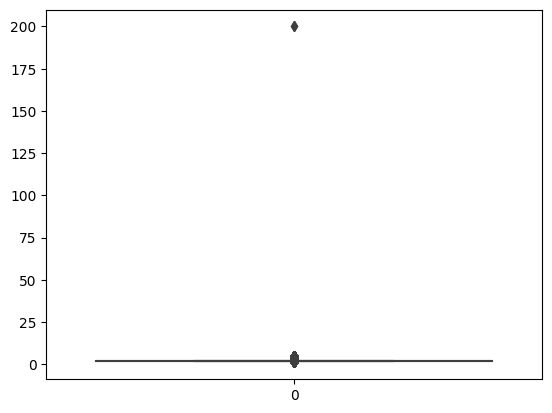

In [8]:
# To check for outliers
sns.boxplot(df['PROD_QTY'])

In [9]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [10]:
dw.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [11]:
#Let us use z-score method to remove outliers
#let us find the limits first
upper_limit = df['PROD_QTY'].mean() + 5*df['PROD_QTY'].std()
lower_limit = df['PROD_QTY'].mean() - 5*df['PROD_QTY'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 5.125578619102677
lower limit: -1.3109612710080063


In [12]:
#find the outliers
df.loc[(df['PROD_QTY'] > upper_limit) | (df['PROD_QTY'] < lower_limit)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [13]:
#trimming out the outliers
outliers = df.loc[(df['PROD_QTY'] > upper_limit) | (df['PROD_QTY'] < lower_limit)]
print ('old data:', len(df))
print ('outliers:', len(outliers))

print ('new data after removing outliers', len(df)-len(outliers))

old data: 264836
outliers: 2
new data after removing outliers 264834


In [14]:
#Print the new dataset without outliers
df_new = df[(df['PROD_QTY'] >= lower_limit) & (df['PROD_QTY'] <= upper_limit)]
#df.loc[(df['PROD_QTY'] >= upper_limit) | (df['PROD_QTY'] <= lower_limit)]
print (df_new)

#After trimming out the outliers, the total data rows were 264,834; which is also the same number of rows after printing the dataset without outliers.

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chi

In [15]:
# Let us check for Duplicates: Find and display duplicate rows:
duplicates = df_new[df_new.duplicated()]
print(duplicates)
#After carefully inspecting the data, the supposed duplicate value is the loyalty card number'107024', 
#however its not a duplicate value but different transactions by a particular customer.

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
124845  43374        107          107024  108462        45   

                                     PROD_NAME  PROD_QTY  TOT_SALES  
124845  Smiths Thinly Cut   Roast Chicken 175g         2        6.0  


In [16]:
# Let us check for Duplicates: Find and display duplicate rows:
duplicates = dw[dw.duplicated()]
print(duplicates)

#As seen below, there are no duplicate data.

Empty DataFrame
Columns: [LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [17]:
# Check for null values
null_values = df_new.isnull()
print("Null Values in the DataFrame:")
print(null_values)

#These shows there are no null value in the dataset

Null Values in the DataFrame:
         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME  \
0       False      False           False   False     False      False   
1       False      False           False   False     False      False   
2       False      False           False   False     False      False   
3       False      False           False   False     False      False   
4       False      False           False   False     False      False   
...       ...        ...             ...     ...       ...        ...   
264831  False      False           False   False     False      False   
264832  False      False           False   False     False      False   
264833  False      False           False   False     False      False   
264834  False      False           False   False     False      False   
264835  False      False           False   False     False      False   

        PROD_QTY  TOT_SALES  
0          False      False  
1          False      False  
2  

In [15]:
# Check for null values
null_values = dw.isnull()
print("Null Values in the DataFrame:")
print(null_values)
#These shows there are no null value in the dataset

Null Values in the DataFrame:
       LYLTY_CARD_NBR  LIFESTAGE  PREMIUM_CUSTOMER
0               False      False             False
1               False      False             False
2               False      False             False
3               False      False             False
4               False      False             False
...               ...        ...               ...
72632           False      False             False
72633           False      False             False
72634           False      False             False
72635           False      False             False
72636           False      False             False

[72637 rows x 3 columns]


In [16]:
# Save the cleaned and renamed DataFrame to an Excel file
df_new.to_excel("df_new.xlsx", index=False)  # 'index=False' prevents saving the index as a separate column

print("File saved successfully.")

File saved successfully.


In [17]:
df_new.to_excel(r'C:\Users\USER\Documents\Data Science\Quantium Project\df_new.xlsx', index=False)
